Tüm test seti yükleniyor ve değerlendiriliyor...
Found 566 files belonging to 2 classes.
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.9379 - loss: 0.1559

Test Seti Toplam Doğruluğu: 0.9541
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


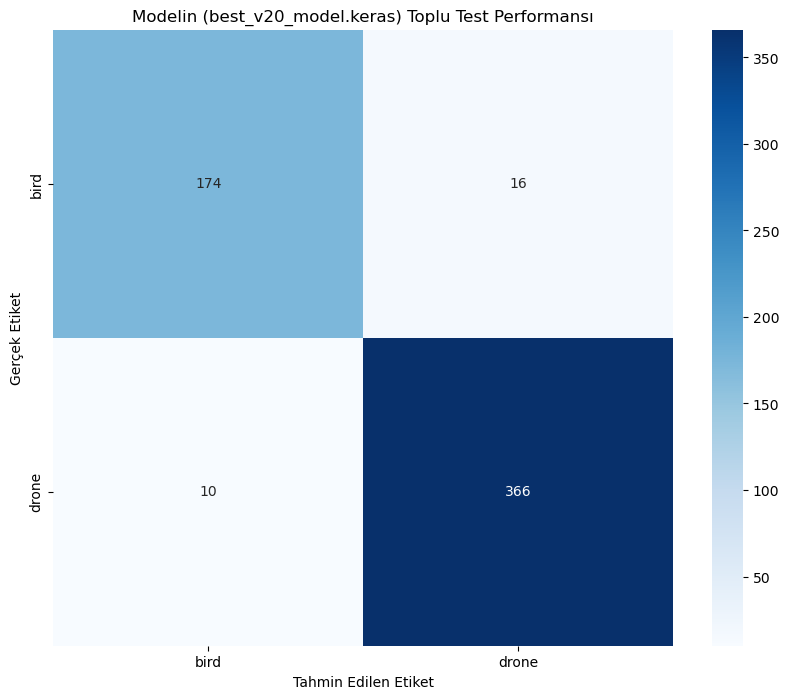


>>> TEK BİR GÖRÜNTÜ İLE TEST BAŞLATILIYOR <<<
'tek_test_resmi.jpg' için tahmin yapılıyor...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step

Gerçek Etiket: Bilinmiyor
Modelin Tahmini: drone
Güven Oranı: 99.96%


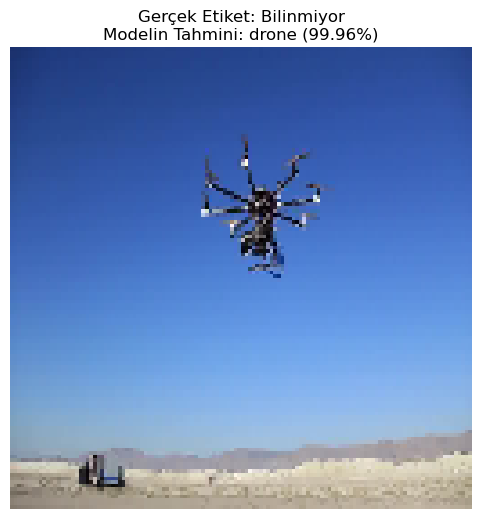


Tek görüntü testi tamamlandı.


In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os

BASE_PATH = "C:/Users/mkasl/OneDrive/Demo-ve-yontem-1-main/Progress-rapor-2-master/final_dataset1"
TEST_PATH = os.path.join(BASE_PATH, 'test')
IMAGE_SIZE = (128, 128) 
BATCH_SIZE = 32
MODEL_PATH = 'best_v20_model.keras'

print("Tüm test seti yükleniyor ve değerlendiriliyor...")
test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_PATH, labels='inferred', label_mode='categorical',
    image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, shuffle=False)
class_names = test_dataset.class_names
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


if not os.path.exists(MODEL_PATH):
    print(f"HATA: Model bulunamadı. -> '{MODEL_PATH}'")
    exit()
model = tf.keras.models.load_model(MODEL_PATH)

test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"\nTest Seti Toplam Doğruluğu: {test_accuracy:.4f}")

y_pred_probs = model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.concatenate([y for x, y in test_dataset], axis=0)
y_true = np.argmax(y_true_labels, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Modelin ({os.path.basename(MODEL_PATH)}) Toplu Test Performansı')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()

print("\n" + "="*50)
print(">>> TEK BİR GÖRÜNTÜ İLE TEST BAŞLATILIYOR <<<")
print("="*50)


SINGLE_IMAGE_PATH = "tek_test_resmi.jpg" 

if not os.path.exists(SINGLE_IMAGE_PATH):
    print(f"HATA: '{SINGLE_IMAGE_PATH}' adında bir test resmi bulunamadı!")
else:
    img = tf.keras.utils.load_img(
        SINGLE_IMAGE_PATH, target_size=IMAGE_SIZE
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    print(f"'{SINGLE_IMAGE_PATH}' için tahmin yapılıyor...")
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    true_label = "Bilinmiyor"
    if 'bird' in SINGLE_IMAGE_PATH.lower():
        true_label = 'bird'
    elif 'drone' in SINGLE_IMAGE_PATH.lower():
        true_label = 'drone'
        
    print(f"\nGerçek Etiket: {true_label}")
    print(f"Modelin Tahmini: {predicted_class_name}")
    print(f"Güven Oranı: {confidence:.2f}%")

    #Görüntüyü, gerçek etiketini ve tahminini başlıkta göstererek çizdiriyorum.
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Gerçek Etiket: {true_label}\nModelin Tahmini: {predicted_class_name} ({confidence:.2f}%)")
    plt.axis("off")
    plt.show()
